In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [16]:
dt = pd.read_csv('/content/sales_data.csv')
dt.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [17]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler
from sklearn.preprocessing import OrdinalEncoder

scaler_mm = MinMaxScaler()

dt[['nSales_Amount']] = scaler_mm.fit_transform(dt[['Sales_Amount']])
dt[['nQuantity_Sold']] = scaler_mm.fit_transform(dt[['Quantity_Sold']])
dt[['nUnit_Cost']] = scaler_mm.fit_transform(dt[['Unit_Cost']])
dt[['nUnit_Price']] = scaler_mm.fit_transform(dt[['Unit_Price']])
dt[['nDiscount']] = scaler_mm.fit_transform(dt[['Discount']])

dt['Product_Category'] = dt['Product_Category'].map({'Clothing': 3,'Furniture': 2, 'Food': 1,'Electronics' : 0})

dt.drop(columns=['Product_ID'], inplace=True, errors='ignore')
dt.drop(columns=['Sale_Date'], inplace=True)
dt.drop(columns=['Sales_Rep'], inplace=True)
dt.drop(columns=['Region'], inplace=True)
dt.drop(columns=['Customer_Type'], inplace=True)
dt.drop(columns=['Payment_Method'], inplace=True)
dt.drop(columns=['Sales_Channel'], inplace=True)
dt.drop(columns=['Region_and_Sales_Rep'], inplace=True)
dt.drop(columns=['Sales_Amount'], inplace=True)
dt.drop(columns=['Quantity_Sold'], inplace=True)
dt.drop(columns=['Unit_Cost'], inplace=True)
dt.drop(columns=['Unit_Price'], inplace=True)
dt.drop(columns=['Discount'], inplace=True)

dt.head()

,Product_Category,nSales_Amount,nQuantity_Sold,nUnit_Cost,nUnit_Price,nDiscount
0,2,0.500950,0.354167,0.018738,0.018976,0.300000
1,2,0.433202,0.333333,0.761113,0.766312,0.366667
2,1,0.458201,0.604167,0.040786,0.038726,0.666667
3,3,0.209105,0.791667,0.865194,0.815281,0.066667
4,0,0.369108,0.250000,0.116938,0.099637,0.266667


In [18]:
vals = dt["Product_Category"].unique()
vals

array([2, 1, 3, 0])

In [19]:
cols_for_clusters = ['nSales_Amount', 'nQuantity_Sold', 'nUnit_Cost', 'nUnit_Price' , 'nDiscount']

df= dt[cols_for_clusters].copy()

In [20]:
df.head()

,nSales_Amount,nQuantity_Sold,nUnit_Cost,nUnit_Price,nDiscount
0,0.500950,0.354167,0.018738,0.018976,0.300000
1,0.433202,0.333333,0.761113,0.766312,0.366667
2,0.458201,0.604167,0.040786,0.038726,0.666667
3,0.209105,0.791667,0.865194,0.815281,0.066667
4,0.369108,0.250000,0.116938,0.099637,0.266667


In [21]:
X = df
y = dt['Product_Category']
yvals = dt['Product_Category']

In [22]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans


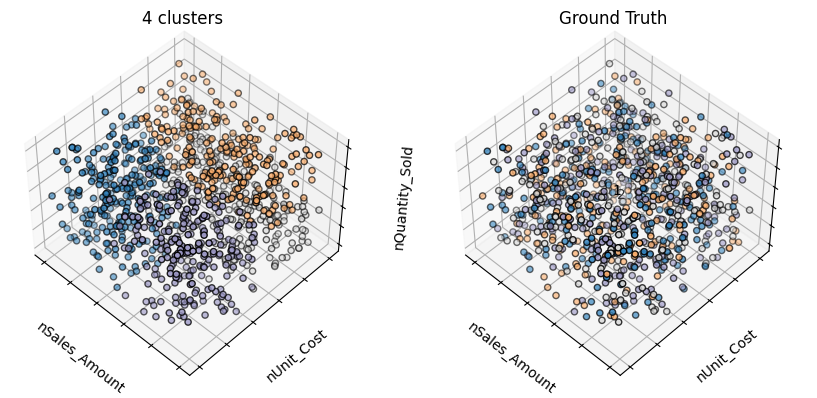

In [40]:
estimators = [
    ("k_means_stress_4", KMeans(n_clusters=4)),
]

fig = plt.figure(figsize=(10, 8))
titles = ["4 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["nSales_Amount"], X["nUnit_Cost"], X["nQuantity_Sold"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("nSales_Amount")
    ax.set_ylabel("nUnit_Cost")
    ax.set_zlabel("nQuantity_Sold")
    ax.set_title(title)

ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dt[dt["Product_Category"]==name]
    ax.text3D(
        ds["nSales_Amount"].mean(),
        ds["nUnit_Cost"].mean(),
        ds["nQuantity_Sold"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["nSales_Amount"], X["nUnit_Cost"], X["nQuantity_Sold"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("nSales_Amount")
ax.set_ylabel("nUnit_Cost")
ax.set_zlabel("nQuantity_Sold")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [41]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)


In [42]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.19
Adjusted Rand Index: 0.00


In [43]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


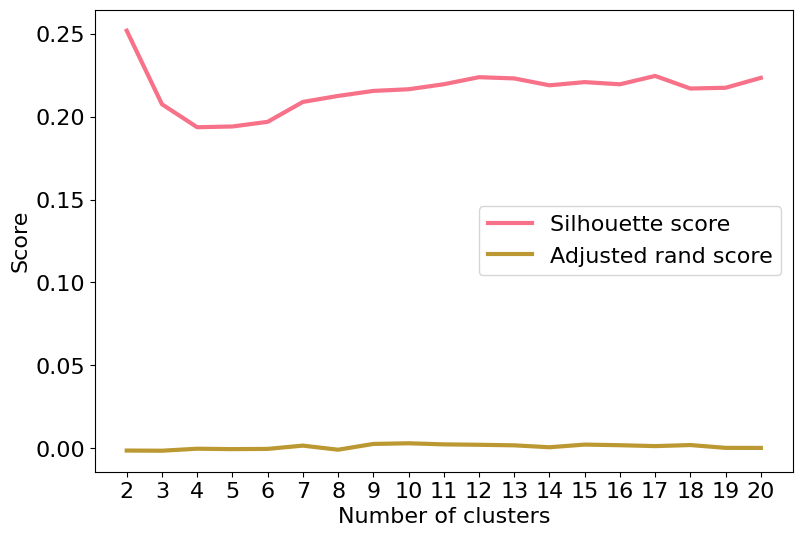

In [44]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

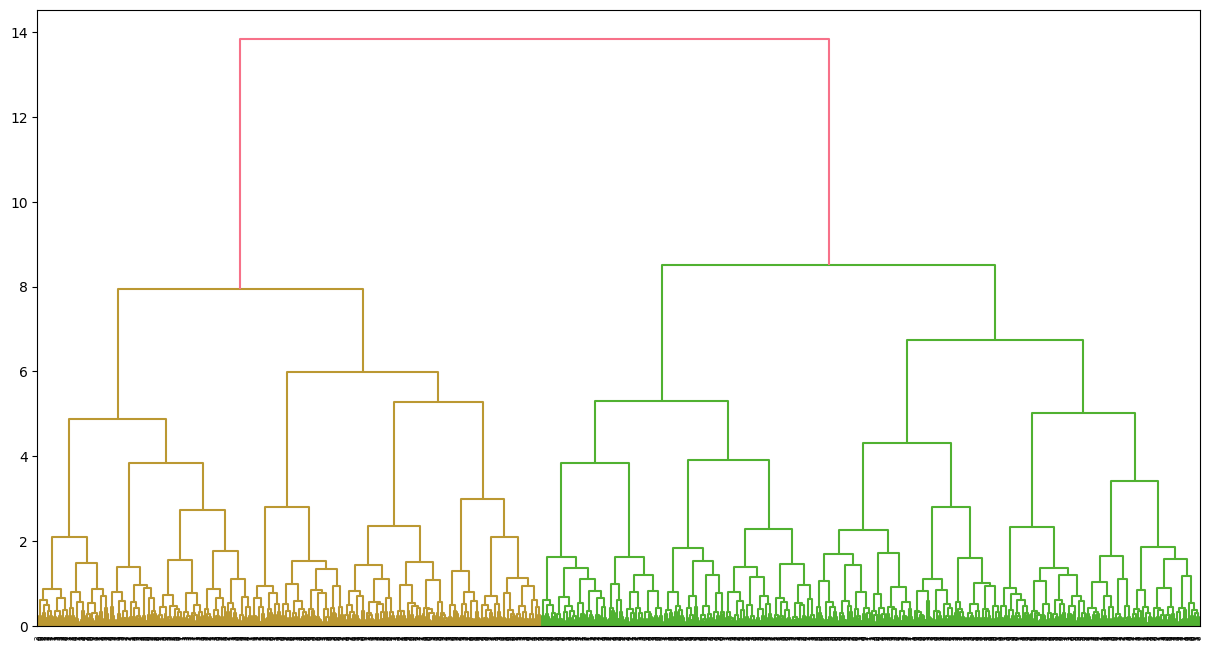

In [46]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

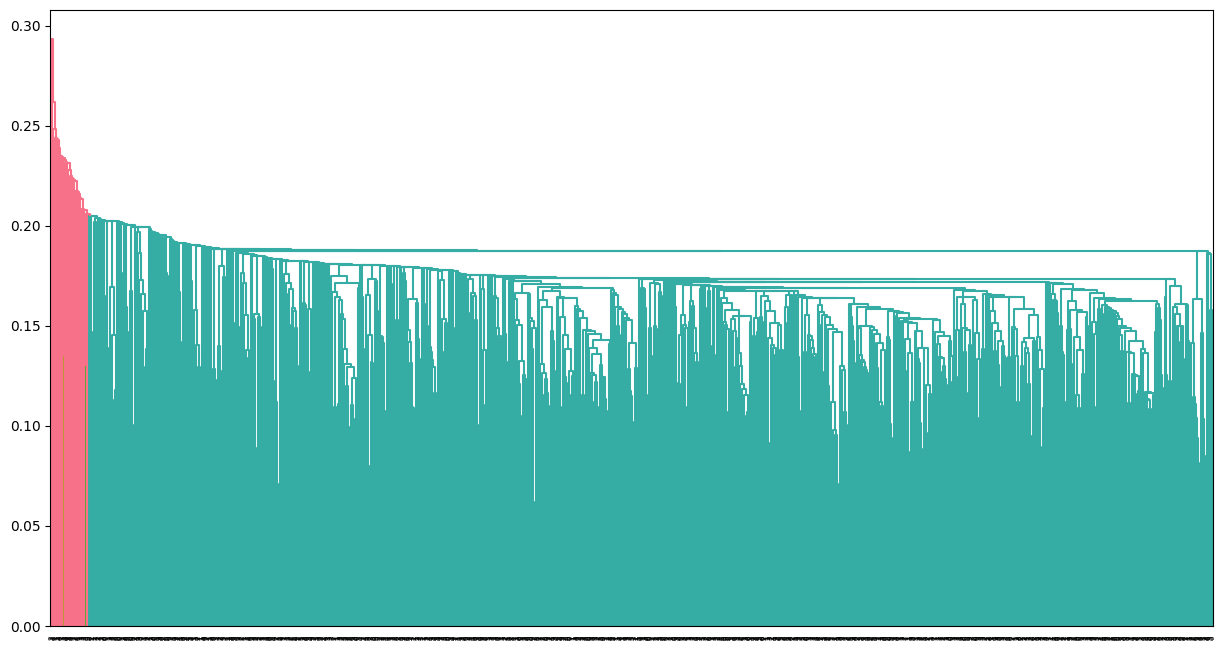

In [47]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [48]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [49]:
mins = X.shape[1]

['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']


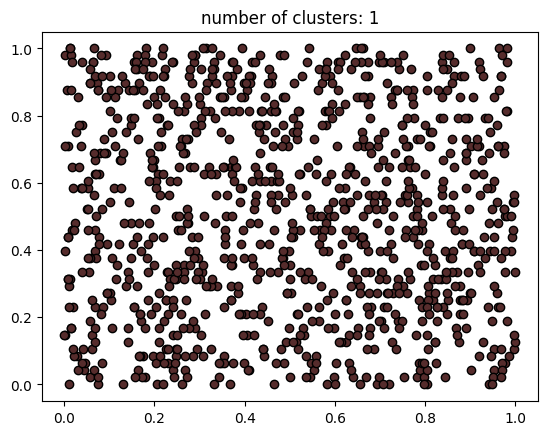

In [50]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["nSales_Amount"], xy["nQuantity_Sold"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["nSales_Amount"], xy["nQuantity_Sold"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

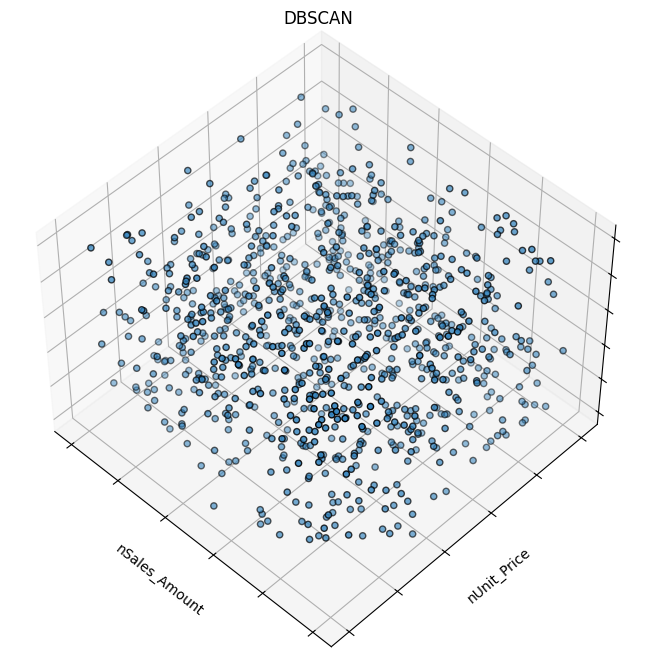

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["nSales_Amount"], X["nUnit_Price"], X["nQuantity_Sold"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("nSales_Amount")
ax.set_ylabel("nUnit_Price")
ax.set_zlabel("nQuantity_Sold")
ax.set_title("DBSCAN")

plt.show()

In [59]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

if len(unique_labels) > 1:
    sc = silhouette_score(X, labels)
    print("Silhouette Coefficient: %0.2f" % sc)
else:
    print("Недостаточно уникальных меток для вычисления коэффициента силуэта.")

ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient: 0.66
Adjusted Rand Index: 1.00
